# Import Libraries


In [ ]:
import pandas as pd

df = pd.read_csv('/tmp/yield_df.csv')
df.head()


   Unnamed: 0     Area         Item  Year  hg/ha_yield  \
0           0  Albania        Maize  1990        36613   
1           1  Albania     Potatoes  1990        66667   
2           2  Albania  Rice, paddy  1990        23333   
3           3  Albania      Sorghum  1990        12500   
4           4  Albania     Soybeans  1990         7000   

   average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                         1485.0              121.0     16.37  
1                         1485.0              121.0     16.37  
2                         1485.0              121.0     16.37  
3                         1485.0              121.0     16.37  
4                         1485.0              121.0     16.37  

# Part 1 - Data preparation

Filter the DataFrame `df` to include only data for a specific country. Replace 'your_country' with the actual country name.


In [ ]:
df_country = df[df['Area'] == 'India']


# Part 2 - Exploratory analysis


Explore the relationships between crop yield (`hg/ha_yield`), rainfall (`average_rain_fall_mm_per_year`), pesticide use (`pesticides_tonnes`), and temperature (`avg_temp`) for the country 'India' using the DataFrame `df_country`.

In [ ]:
# Calculate summary statistics for relevant columns
df_country[['hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']].describe()


         hg/ha_yield  average_rain_fall_mm_per_year  pesticides_tonnes  \
count    4048.000000                         4048.0        4048.000000   
mean    80884.467391                         1083.0       48459.040000   
std     95950.224381                            0.0       14997.351972   
min      6553.000000                         1083.0       14485.330000   
25%     13704.750000                         1083.0       37423.000000   
50%     28124.000000                         1083.0       46195.000000   
75%    112471.000000                         1083.0       61257.000000   
max    385818.000000                         1083.0       75000.000000   

          avg_temp  
count  4048.000000  
mean     26.012589  
std       0.909861  
min      23.260000  
25%      25.460000  
50%      25.980000  
75%      26.670000  
max      28.850000  

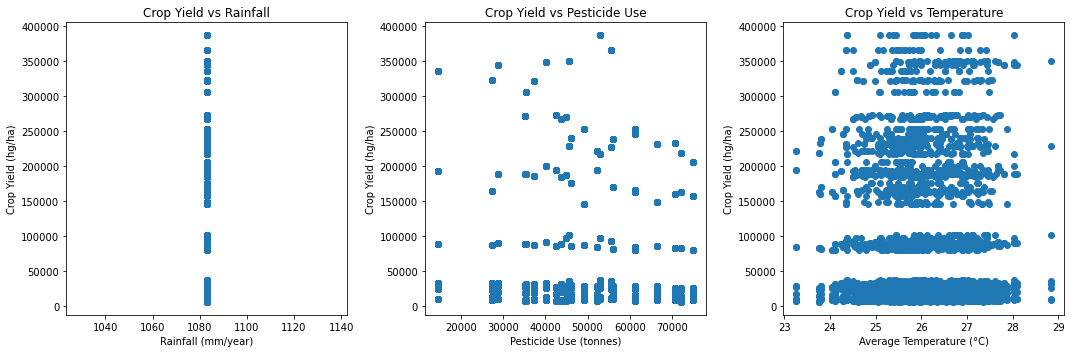

In [ ]:
import matplotlib.pyplot as plt

# Create scatter plots
plt.figure(figsize=(15, 5))

# Crop yield vs rainfall
plt.subplot(1, 3, 1)
plt.scatter(df_country['average_rain_fall_mm_per_year'], df_country['hg/ha_yield'])
plt.xlabel('Rainfall (mm/year)')
plt.ylabel('Crop Yield (hg/ha)')
plt.title('Crop Yield vs Rainfall')

# Crop yield vs pesticide use
plt.subplot(1, 3, 2)
plt.scatter(df_country['pesticides_tonnes'], df_country['hg/ha_yield'])
plt.xlabel('Pesticide Use (tonnes)')
plt.ylabel('Crop Yield (hg/ha)')
plt.title('Crop Yield vs Pesticide Use')

# Crop yield vs temperature
plt.subplot(1, 3, 3)
plt.scatter(df_country['avg_temp'], df_country['hg/ha_yield'])
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Crop Yield (hg/ha)')
plt.title('Crop Yield vs Temperature')

plt.tight_layout()
plt.show()



# Part 3 - Feature engineering



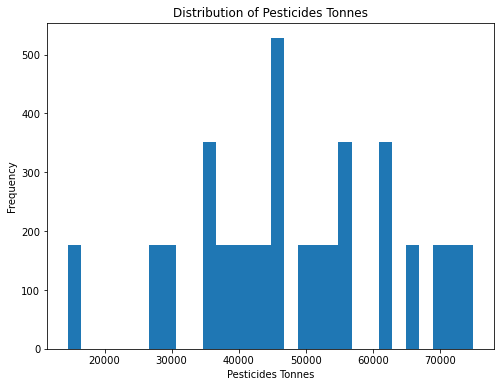

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df_country['pesticides_tonnes'], bins=30)
plt.title('Distribution of Pesticides Tonnes')
plt.xlabel('Pesticides Tonnes')
plt.ylabel('Frequency')
plt.show()


The histogram shows that the 'pesticides_tonnes' feature is highly skewed. To address this, I will apply a logarithmic transformation to make the distribution more symmetrical.



<ipython-input-13-4e8b928db579>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



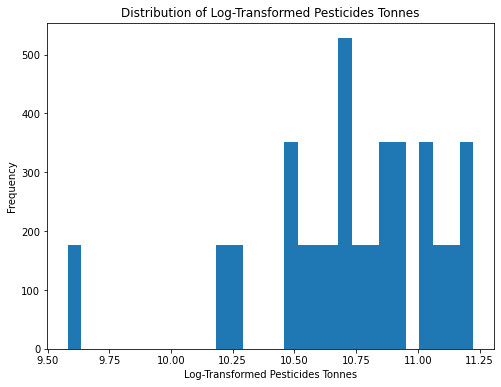

In [ ]:
df_country['log_pesticides'] = np.log1p(df_country['pesticides_tonnes'])

plt.figure(figsize=(8, 6))
plt.hist(df_country['log_pesticides'], bins=30)
plt.title('Distribution of Log-Transformed Pesticides Tonnes')
plt.xlabel('Log-Transformed Pesticides Tonnes')
plt.ylabel('Frequency')
plt.show()


# Part 4 - Train test split




In [ ]:
from sklearn.model_selection import train_test_split

# Select features and target variable
features = ['average_rain_fall_mm_per_year', 'log_pesticides', 'avg_temp']
target = 'hg/ha_yield'

X = df_country[features]
y = df_country[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Part 5 - Train the model


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate a RandomForestRegressor object
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

# Part 6 - Model evaluation




In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Instantiate a RandomForestRegressor object
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared Score:", r2)


Mean Squared Error (MSE): 12396941906.828453
R-squared Score: -0.2712364264698528


# Part 7 - Data visualization



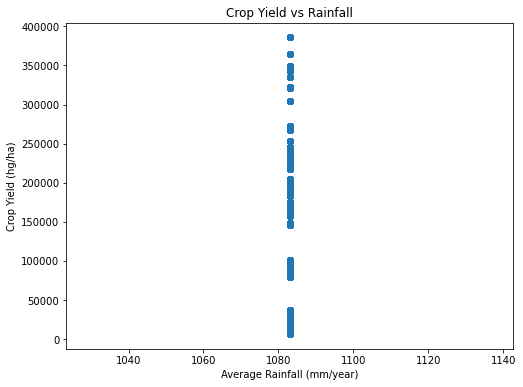

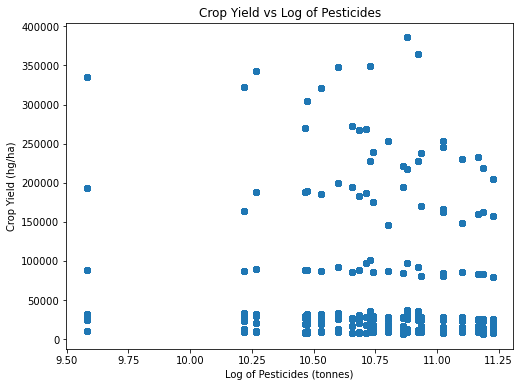

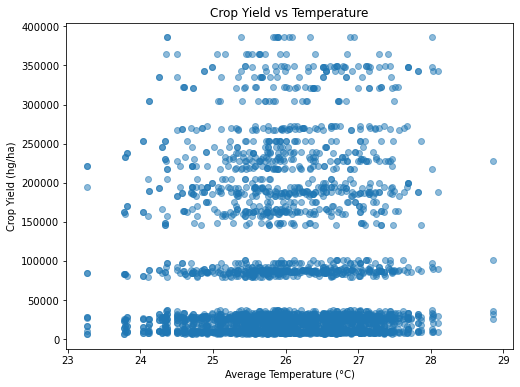

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for crop yield vs rainfall
plt.figure(figsize=(8, 6))
plt.scatter(X_train['average_rain_fall_mm_per_year'], y_train, alpha=0.5)
plt.xlabel('Average Rainfall (mm/year)')
plt.ylabel('Crop Yield (hg/ha)')
plt.title('Crop Yield vs Rainfall')
plt.show()

# Scatter plot for crop yield vs log_pesticides
plt.figure(figsize=(8, 6))
plt.scatter(X_train['log_pesticides'], y_train, alpha=0.5)
plt.xlabel('Log of Pesticides (tonnes)')
plt.ylabel('Crop Yield (hg/ha)')
plt.title('Crop Yield vs Log of Pesticides')
plt.show()

# Scatter plot for crop yield vs temperature
plt.figure(figsize=(8, 6))
plt.scatter(X_train['avg_temp'], y_train, alpha=0.5)
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Crop Yield (hg/ha)')
plt.title('Crop Yield vs Temperature')
plt.show()
